Training and evaluating: Linear Regression
Cross-validated RMSE: 0.5423
Test RMSE: 0.6049
Test R^2: -0.4700

Training and evaluating: Ridge Regression
Cross-validated RMSE: 0.4110
Test RMSE: 0.5272
Test R^2: -0.1167

Training and evaluating: Lasso Regression
Cross-validated RMSE: 0.3854
Test RMSE: 0.4130
Test R^2: 0.3147



/tmp/ipython-input-1-3741703144.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=test_rmse_scores, palette='viridis')
/tmp/ipython-input-1-3741703144.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=test_r2_scores, palette='magma')


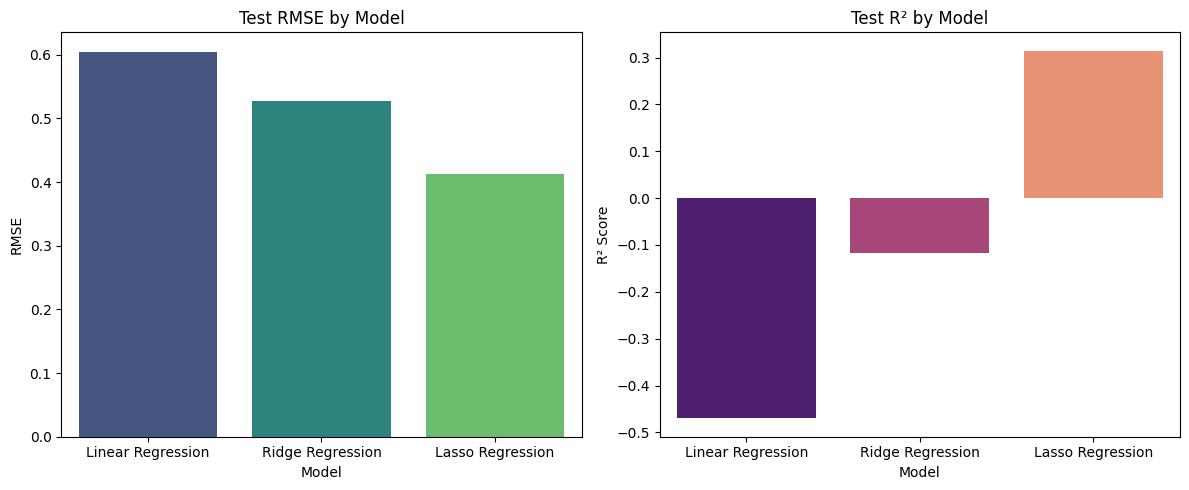

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load cleaned dataset
df = pd.read_csv('cleaned_heart.csv')  # replace with your actual cleaned data file

# 2. Define features (X) and condition (y)
X = df.drop(columns=['condition'])
y = df['condition']

# 3. Feature engineering: create polynomial features (degree=2) to capture interactions
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 4. Scale features (important for regularization models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# 5. Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Prepare lists to collect evaluation results for visualization
model_names = []
cv_rmse_scores = []
test_rmse_scores = []
test_r2_scores = []

# 7. Train, cross-validate, and evaluate models
for name, model in models.items():
    print(f"Training and evaluating: {name}")

    # Cross-validation (5-fold) using negative MSE (convert to RMSE)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()

    # Fit model on full training set
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate test RMSE and R^2
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)

    # Store results
    model_names.append(name)
    cv_rmse_scores.append(cv_rmse)
    test_rmse_scores.append(test_rmse)
    test_r2_scores.append(test_r2)

    # Print evaluation metrics
    print(f"Cross-validated RMSE: {cv_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R^2: {test_r2:.4f}\n")

# 8. Visualize model performance

plt.figure(figsize=(12,5))

# RMSE comparison
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=test_rmse_scores, palette='viridis')
plt.title('Test RMSE by Model')
plt.ylabel('RMSE')
plt.xlabel('Model')

# R^2 comparison
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=test_r2_scores, palette='magma')
plt.title('Test R² by Model')
plt.ylabel('R² Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()
